In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel('covid19_clinical_dataset.xlsx')#,parse_dates=['Date']
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [7]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [8]:
df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [9]:
#our target column SARS-Cov-2 exam result has no mssing value

In [10]:
dfnull = df.isnull().mean().round(4) * 100

dfnull.sort_values(ascending=False)

Prothrombin time (PT), Activity                          100.0
D-Dimer                                                  100.0
Mycoplasma pneumoniae                                    100.0
Urine - Sugar                                            100.0
Partial thromboplastin time (PTT)                        100.0
                                                         ...  
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.0
Patient addmited to regular ward (1=yes, 0=no)             0.0
SARS-Cov-2 exam result                                     0.0
Patient age quantile                                       0.0
Patient ID                                                 0.0
Length: 111, dtype: float64

In [11]:
nullval = dfnull[dfnull > 95]

df = df[[col for col in df.columns 
         if col not in nullval]]

df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Strepto A
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#only left with 46 column great

In [13]:
df=df.drop('Patient ID', axis=1)

In [14]:
df=df.drop('Patient addmited to regular ward (1=yes, 0=no)',axis=1)
df=df.drop('Patient addmited to semi-intensive unit (1=yes, 0=no)', axis=1)
df=df.drop('Patient addmited to intensive care unit (1=yes, 0=no)', axis=1)

In [15]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient age quantile,5644,NaN,NaN,NaN,9.31839,5.7779,0,4,9,14,19
SARS-Cov-2 exam result,5644,2,negative,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hematocrit,603,NaN,NaN,NaN,-2.18621e-09,1.00083,-4.50142,-0.518807,0.053407,0.717175,2.6627
Hemoglobin,603,NaN,NaN,NaN,-1.60132e-08,1.00083,-4.3456,-0.586244,0.040316,0.729532,2.67187
Platelets,602,NaN,NaN,NaN,-3.535e-10,1.00083,-2.55243,-0.605346,-0.121716,0.531498,9.53203
Mean platelet volume,599,NaN,NaN,NaN,7.43814e-09,1.00084,-2.45757,-0.662483,-0.101517,0.683835,3.71305
Red blood Cells,602,NaN,NaN,NaN,8.42445e-09,1.00083,-3.97061,-0.56795,0.0138521,0.666176,3.64571
Lymphocytes,602,NaN,NaN,NaN,-7.86674e-09,1.00083,-1.86507,-0.730707,-0.014267,0.597692,3.7641
Mean corpuscular hemoglobin concentration (MCHC),602,NaN,NaN,NaN,1.01486e-09,1.00083,-5.43181,-0.552476,-0.0545852,0.642463,3.33107
Leukocytes,602,NaN,NaN,NaN,6.21583e-09,1.00083,-2.0203,-0.637255,-0.212879,0.454295,4.52204


In [16]:
df.isnull().sum()

Patient age quantile                                   0
SARS-Cov-2 exam result                                 0
Hematocrit                                          5041
Hemoglobin                                          5041
Platelets                                           5042
Mean platelet volume                                5045
Red blood Cells                                     5042
Lymphocytes                                         5042
Mean corpuscular hemoglobin concentration (MCHC)    5042
Leukocytes                                          5042
Basophils                                           5042
Mean corpuscular hemoglobin (MCH)                   5042
Eosinophils                                         5042
Mean corpuscular volume (MCV)                       5042
Monocytes                                           5043
Red blood cell distribution width (RDW)             5042
Respiratory Syncytial Virus                         4290
Influenza A                    

In [17]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

not_detected    1302
detected          52
Name: Respiratory Syncytial Virus, dtype: int64

not_detected    1336
detected          18
Name: Influenza A, dtype: int64

not_detected    1277
detected          77
Name: Influenza B, dtype: int64

not_detected    1349
detected           3
Name: Parainfluenza 1, dtype: int64

not_detected    1307
detected          45
Name: CoronavirusNL63, dtype: int64

not_detected    973
detected        379
Name: Rhinovirus/Enterovirus, dtype: int64

not_detected    1332
detected          20
Name: Coronavirus HKU1, dtype: int64

not_detected    1342
detected          10
Name: Parainfluenza 3, dtype: int64

not_detected    1343
detected           9
Name: Chlamydophila pneumoniae, dtype: int64

not_detected    1339
detected          13
Name: Adenovirus, dtype: int64

not_detected    1333
detected          19
Name: Parainfluenza 4, dtype: int64

not_detected    1343
detected          

In [18]:
df.groupby("SARS-Cov-2 exam result").count()

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,...,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Strepto A
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,
negative,5086,520,520,519,518,519,519,519,519,519,...,1240,438,338,436,362,313,312,758,758,318
positive,558,83,83,83,81,83,83,83,83,83,...,112,75,59,70,62,58,58,62,62,14


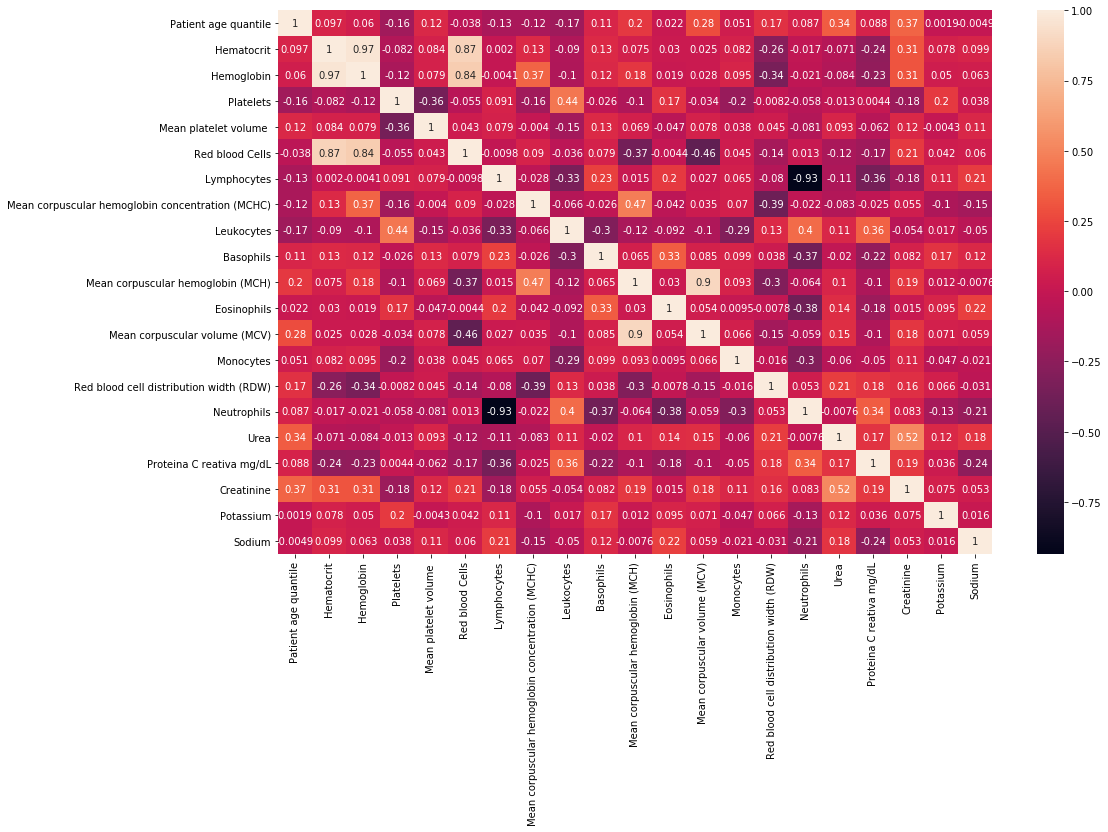

In [19]:
plt.figure(figsize=(16,10))

sns.heatmap(df.corr(), annot=True)

In [20]:
df

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Strepto A
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,...,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.dtypes

Patient age quantile                                  int64
SARS-Cov-2 exam result                               object
Hematocrit                                          float64
Hemoglobin                                          float64
Platelets                                           float64
Mean platelet volume                                float64
Red blood Cells                                     float64
Lymphocytes                                         float64
Mean corpuscular hemoglobin concentration (MCHC)    float64
Leukocytes                                          float64
Basophils                                           float64
Mean corpuscular hemoglobin (MCH)                   float64
Eosinophils                                         float64
Mean corpuscular volume (MCV)                       float64
Monocytes                                           float64
Red blood cell distribution width (RDW)             float64
Respiratory Syncytial Virus             

In [22]:
df.replace('not_detected', 0, inplace=True)
df.replace('detected', 0, inplace=True)
df.replace('negative', 0, inplace=True)
df.replace('positive', 1, inplace=True)
df.replace('absent', 0, inplace=True)
df.replace('present', 1, inplace=True)
df.replace('not_done', 2, inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=LabelEncoder().fit_transform(df[col])

In [24]:
df

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Strepto A
0,13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,...,0.0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0.0,0.0,NaN
2,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df['Strepto A'].value_counts()

0.0    297
1.0     34
2.0      1
Name: Strepto A, dtype: int64

In [26]:
df.isnull().sum()

Patient age quantile                                   0
SARS-Cov-2 exam result                                 0
Hematocrit                                          5041
Hemoglobin                                          5041
Platelets                                           5042
Mean platelet volume                                5045
Red blood Cells                                     5042
Lymphocytes                                         5042
Mean corpuscular hemoglobin concentration (MCHC)    5042
Leukocytes                                          5042
Basophils                                           5042
Mean corpuscular hemoglobin (MCH)                   5042
Eosinophils                                         5042
Mean corpuscular volume (MCV)                       5042
Monocytes                                           5043
Red blood cell distribution width (RDW)             5042
Respiratory Syncytial Virus                         4290
Influenza A                    

In [27]:
df.corr()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Strepto A
Patient age quantile,1.000000,0.075244,0.096808,0.060320,-0.158683,0.119449,-0.037510,-0.125935,-0.124671,-0.166386,...,NaN,0.086923,0.338425,0.088205,0.372614,0.001904,-0.004909,-0.085244,-0.117207,-0.016243
SARS-Cov-2 exam result,0.075244,1.000000,0.099120,0.104775,-0.282268,0.108836,0.121320,-0.015239,0.045820,-0.288508,...,NaN,-0.037977,-0.069234,0.071972,0.081675,-0.087606,-0.092970,-0.033178,-0.074419,-0.070995
Hematocrit,0.096808,0.099120,1.000000,0.968447,-0.082296,0.083580,0.872987,0.002035,0.130771,-0.089937,...,NaN,-0.016724,-0.071353,-0.238217,0.307784,0.078216,0.099445,-0.133212,0.012506,-0.040211
Hemoglobin,0.060320,0.104775,0.968447,1.000000,-0.120150,0.078816,0.841420,-0.004105,0.371708,-0.102375,...,NaN,-0.021399,-0.084179,-0.230484,0.305177,0.049640,0.062500,-0.123270,0.035416,-0.046907
Platelets,-0.158683,-0.282268,-0.082296,-0.120150,1.000000,-0.356332,-0.054561,0.090607,-0.159397,0.443056,...,NaN,-0.058490,-0.012879,0.004362,-0.183308,0.204278,0.038081,-0.087866,-0.027732,0.133836
Mean platelet volume,0.119449,0.108836,0.083580,0.078816,-0.356332,1.000000,0.043419,0.079060,-0.004011,-0.154643,...,NaN,-0.080920,0.093304,-0.062452,0.122173,-0.004287,0.108145,0.032138,-0.068782,0.031983
Red blood Cells,-0.037510,0.121320,0.872987,0.841420,-0.054561,0.043419,1.000000,-0.009843,0.090073,-0.036159,...,NaN,0.012588,-0.121196,-0.165071,0.205990,0.041734,0.059621,-0.093678,-0.029001,-0.039976
Lymphocytes,-0.125935,-0.015239,0.002035,-0.004105,0.090607,0.079060,-0.009843,1.000000,-0.027979,-0.330536,...,NaN,-0.934938,-0.108215,-0.356235,-0.175119,0.112890,0.209211,0.106636,-0.152438,-0.289701
Mean corpuscular hemoglobin concentration (MCHC),-0.124671,0.045820,0.130771,0.371708,-0.159397,-0.004011,0.090073,-0.027979,1.000000,-0.066209,...,NaN,-0.021579,-0.082773,-0.024835,0.055014,-0.103943,-0.145265,0.022278,0.084692,-0.027534
Leukocytes,-0.166386,-0.288508,-0.089937,-0.102375,0.443056,-0.154643,-0.036159,-0.330536,-0.066209,1.000000,...,NaN,0.401938,0.114951,0.360826,-0.053606,0.017234,-0.050327,0.013966,-0.073770,0.279230


In [28]:
df=df.drop('Parainfluenza 2', axis=1) #cause it has no correlation with SARS-Cov-2 exam result

In [31]:
from sklearn.impute import KNNImputer
x = df

imputer = KNNImputer(n_neighbors=4)
x = imputer.fit_transform(x.values)

x = pd.DataFrame(x, columns=df.columns)
x.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Metapneumovirus,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Strepto A
0,13.0,0.0,-0.118258,-0.194644,-0.564520,1.272850,-0.748660,-0.238154,-0.726739,-0.310972,...,0.0,-0.156077,-0.383651,0.099488,-0.244803,0.126745,0.143752,0.0,0.0,0.0
1,17.0,0.0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,...,0.0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0.0,0.0,0.0
2,8.0,0.0,-0.421531,-0.335620,0.277121,0.515546,-0.378423,-0.010003,0.244149,-0.285927,...,0.0,0.392977,0.062950,-0.110638,-0.063883,-0.305787,-0.305473,0.0,0.0,0.0
3,5.0,0.0,0.900284,0.980156,0.314807,-0.522242,0.300346,0.107272,-0.228847,0.533605,...,0.0,-0.381436,0.007125,-0.404716,-0.003576,0.559278,0.053907,0.0,0.0,0.5
4,15.0,0.0,-0.473030,-0.539252,0.151503,-0.971015,0.600062,0.369540,0.493094,-0.050781,...,0.0,0.233178,0.044341,0.205296,-0.175881,-0.491159,0.413287,0.0,0.0,0.0


In [34]:
y = x['SARS-Cov-2 exam result'].values
x.drop(columns=['SARS-Cov-2 exam result'], inplace=True)


In [35]:
x

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,...,Metapneumovirus,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Strepto A
0,13.0,-0.118258,-0.194644,-0.564520,1.272850,-0.748660,-0.238154,-0.726739,-0.310972,3.289013,...,0.0,-0.156077,-0.383651,0.099488,-0.244803,0.126745,0.143752,0.00,0.00,0.0
1,17.0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,...,0.0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0.00,0.00,0.0
2,8.0,-0.421531,-0.335620,0.277121,0.515546,-0.378423,-0.010003,0.244149,-0.285927,0.463516,...,0.0,0.392977,0.062950,-0.110638,-0.063883,-0.305787,-0.305473,0.00,0.00,0.0
3,5.0,0.900284,0.980156,0.314807,-0.522242,0.300346,0.107272,-0.228847,0.533605,-0.376496,...,0.0,-0.381436,0.007125,-0.404716,-0.003576,0.559278,0.053907,0.00,0.00,0.5
4,15.0,-0.473030,-0.539252,0.151503,-0.971015,0.600062,0.369540,0.493094,-0.050781,0.310787,...,0.0,0.233178,0.044341,0.205296,-0.175881,-0.491159,0.413287,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3.0,-0.535974,-0.539252,-0.175104,0.599690,-0.409276,0.188298,-0.179059,-0.339496,0.158057,...,0.0,-0.207295,-0.830251,-0.442966,-0.606643,-0.120416,0.233597,0.25,0.00,0.0
5640,17.0,1.249335,1.089804,-0.288160,0.122869,1.023190,-0.583581,-0.253742,-0.283840,0.539881,...,0.0,0.048794,0.565375,-0.040596,0.496108,0.312116,0.682822,0.00,0.00,0.0
5641,4.0,-0.198368,0.071644,-0.137418,0.038724,0.326791,0.480418,0.244149,-0.646299,0.387152,...,0.0,-0.918198,-0.030092,-0.489661,0.082576,-0.367578,0.413287,0.25,0.00,0.0
5642,10.0,-0.009537,0.008988,-0.366671,-0.522242,0.057928,0.205356,0.020097,-0.605253,0.158057,...,0.0,1.239095,-0.085917,0.301667,-0.477415,0.621068,0.053907,0.25,0.25,0.0


In [36]:
y

array([0., 0., 0., ..., 0., 0., 1.])

In [37]:
dfx=pd.get_dummies(x,drop_first=True)

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(dfx)
newx=sc.transform(dfx)

In [48]:
#pca
#Lets use PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=29)
x_pca=pca.fit_transform(dfx)
print("variance :{}".format(np.sum(pca.explained_variance_ratio_)))

variance :0.9999999999999856


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.30,random_state=42)

In [40]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(), GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.9604486422668241
[[1519   17]
 [  50  108]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1536
         1.0       0.86      0.68      0.76       158

    accuracy                           0.96      1694
   macro avg       0.92      0.84      0.87      1694
weighted avg       0.96      0.96      0.96      1694



Accuracy score of GaussianNB() is:
0.7756788665879575
[[1170  366]
 [  14  144]]
              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86      1536
         1.0       0.28      0.91      0.43       158

    accuracy                           0.78      1694
   macro avg       0.64      0.84      0.65      1694
weighted avg       0.92      0.78      0.82      1694



Accuracy score of SVC() is:
0.9858323494687131
[[1533    3]
 [  21  137]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99

In [41]:
#apply smote

In [42]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,newx,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [43]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    scores=cross_val_score(model,x,y,cv=5,scoring="roc_auc")
    print("Mean roc auc score for classifier: ",scores.mean())
    print("standard deviation in roc auc score for classifier: ",scores.std())
    print(scores)

In [44]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,newx,y)

auc roc score corresponding to  42  is  0.9147088776513554
auc roc score corresponding to  43  is  0.8962810788032027
auc roc score corresponding to  44  is  0.9260561525495153
auc roc score corresponding to  45  is  0.9319953645174885
auc roc score corresponding to  46  is  0.9026329189492905
auc roc score corresponding to  47  is  0.9294976471414524
auc roc score corresponding to  48  is  0.9161047899985955
auc roc score corresponding to  49  is  0.9334307838179519
auc roc score corresponding to  50  is  0.9264687807276303
auc roc score corresponding to  51  is  0.9176192232055064
auc roc score corresponding to  52  is  0.9339224259025145
auc roc score corresponding to  53  is  0.9304414243573536
auc roc score corresponding to  54  is  0.9344535749403007
auc roc score corresponding to  55  is  0.9299892892260149
auc roc score corresponding to  56  is  0.9182293861497401
auc roc score corresponding to  57  is  0.9175402092990589
auc roc score corresponding to  58  is  0.92994978227279

61

In [45]:
#lets print the scores for logistic regression
print("LOGISTIC CLASSIFIER\n\n")
model_evaluation(lg_clf,newx,y)

LOGISTIC CLASSIFIER


Mean roc auc score for classifier:  0.9564286618711831
standard deviation in roc auc score for classifier:  0.013224381967336909
[0.9335652  0.97144086 0.95816653 0.96671759 0.95225314]


In [55]:
svc1=SVC(kernel="rbf",C=10)
max_aucroc_score(svc1,x_pca,y)

auc roc score corresponding to  42  is  0.9424954347520719
auc roc score corresponding to  43  is  0.9320919370698132
auc roc score corresponding to  44  is  0.9673145806995366
auc roc score corresponding to  45  is  0.9662917895771879
auc roc score corresponding to  46  is  0.9266838741396264
auc roc score corresponding to  47  is  0.9558882918949291
auc roc score corresponding to  48  is  0.9554361567635904
auc roc score corresponding to  49  is  0.951463513133867
auc roc score corresponding to  50  is  0.9534695884253406
auc roc score corresponding to  51  is  0.9524072903497682
auc roc score corresponding to  52  is  0.9539217235566794
auc roc score corresponding to  53  is  0.9712872243292596
auc roc score corresponding to  54  is  0.9618670108161258
auc roc score corresponding to  55  is  0.9459764362972328
auc roc score corresponding to  56  is  0.951463513133867
auc roc score corresponding to  57  is  0.9578943671864026
auc roc score corresponding to  58  is  0.9514240061806433

84

In [49]:
#Lets chcek the decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,x_pca,y)

auc roc score corresponding to  42  is  0.9365957297373226
auc roc score corresponding to  43  is  0.9222195884253406
auc roc score corresponding to  44  is  0.9559277988481528
auc roc score corresponding to  45  is  0.9286504424778761
auc roc score corresponding to  46  is  0.9351208034836354
auc roc score corresponding to  47  is  0.9375790139064475
auc roc score corresponding to  48  is  0.9390934471133587
auc roc score corresponding to  49  is  0.9599399494310998
auc roc score corresponding to  50  is  0.9410600154516086
auc roc score corresponding to  51  is  0.933645877229948
auc roc score corresponding to  52  is  0.9584255162241888
auc roc score corresponding to  53  is  0.9559673058013767
auc roc score corresponding to  54  is  0.9430660907430819
auc roc score corresponding to  55  is  0.9450326590813316
auc roc score corresponding to  56  is  0.951503020087091
auc roc score corresponding to  57  is  0.9326625930608231
auc roc score corresponding to  58  is  0.9425349417052956

90

In [50]:
#Lets print the scores of decision tree
print("Decision tree CLASSIFIER\n\n")
model_evaluation(dc,x_pca,y)

Decision tree CLASSIFIER


Mean roc auc score for classifier:  0.9339563206247187
standard deviation in roc auc score for classifier:  0.025345778310729834
[0.91524186 0.96780622 0.90530622 0.92066565 0.96076165]


In [52]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,x_pca,y)

auc roc score corresponding to  42  is  0.9399977173760359
auc roc score corresponding to  43  is  0.9270965023177413
auc roc score corresponding to  44  is  0.9648168633235005
auc roc score corresponding to  45  is  0.9504012150582948
auc roc score corresponding to  46  is  0.9335668633235005
auc roc score corresponding to  47  is  0.9370083579154376
auc roc score corresponding to  48  is  0.9519156482652058
auc roc score corresponding to  49  is  0.9593297864868662
auc roc score corresponding to  50  is  0.948434646720045
auc roc score corresponding to  51  is  0.9439703610057593
auc roc score corresponding to  52  is  0.9499095729737324
auc roc score corresponding to  53  is  0.9548655007725804
auc roc score corresponding to  54  is  0.9662917895771879
auc roc score corresponding to  55  is  0.9479430046354825
auc roc score corresponding to  56  is  0.9410205084983846
auc roc score corresponding to  57  is  0.9519156482652058
auc roc score corresponding to  58  is  0.931560788032026

90

In [54]:
kc=KNeighborsClassifier(n_neighbors=15)
max_aucroc_score(kc,x_pca,y)

auc roc score corresponding to  42  is  0.9540402444163506
auc roc score corresponding to  43  is  0.9699308189352437
auc roc score corresponding to  44  is  0.9704619679730299
auc roc score corresponding to  45  is  0.965466533220958
auc roc score corresponding to  46  is  0.9580523949992977
auc roc score corresponding to  47  is  0.9585440370838602
auc roc score corresponding to  48  is  0.9669414594746453
auc roc score corresponding to  49  is  0.9689870417193426
auc roc score corresponding to  50  is  0.9664893243433067
auc roc score corresponding to  51  is  0.9748867467340918
auc roc score corresponding to  52  is  0.9709141031043687
auc roc score corresponding to  53  is  0.9580523949992977
auc roc score corresponding to  54  is  0.9783677482792528
auc roc score corresponding to  55  is  0.9669809664278691
auc roc score corresponding to  56  is  0.9644832490518331
auc roc score corresponding to  57  is  0.9674726085124316
auc roc score corresponding to  58  is  0.966449817390082

85

In [59]:
#all models are performing well but i think ...., because of  lot of missing data i cant say the model is accurate

In [58]:
#Lets choose random forest classifier as our final model and random state 90
x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = 90,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
rf_clf=RandomForestClassifier(n_estimators=500)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Confusion matrix 
 [[1010    7]
 [   5  107]]
f1 score is :  0.9469026548672567
classification report 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1017
         1.0       0.94      0.96      0.95       112

    accuracy                           0.99      1129
   macro avg       0.97      0.97      0.97      1129
weighted avg       0.99      0.99      0.99      1129

AUC ROC Score:  0.9742370768366344
Accuracy score:  0.9893711248892826


# task  2

In [190]:
df2=pd.read_excel('covid19_clinical_dataset.xlsx')#,parse_dates=['Date']
df2

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
df2null = df2.isnull().mean().round(4) * 100

df2null.sort_values(ascending=False)

Prothrombin time (PT), Activity                          100.0
D-Dimer                                                  100.0
Mycoplasma pneumoniae                                    100.0
Urine - Sugar                                            100.0
Partial thromboplastin time (PTT)                        100.0
                                                         ...  
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.0
Patient addmited to regular ward (1=yes, 0=no)             0.0
SARS-Cov-2 exam result                                     0.0
Patient age quantile                                       0.0
Patient ID                                                 0.0
Length: 111, dtype: float64

In [192]:
nullval = df2null[dfnull > 90]

df2 = df2[[col for col in df2.columns 
         if col not in nullval]]

df2

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df2=df2.drop('Patient ID', axis=1)

In [194]:
df2=df2.drop('SARS-Cov-2 exam result', axis=1)

In [195]:
df2

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# we have to create a new unique target column
dftar2 = ['Patient addmited to regular ward (1=yes, 0=no)',
                 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                 'Patient addmited to intensive care unit (1=yes, 0=no)']

In [197]:
dftar2

['Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)']

In [198]:
## calculate the number of possibilities for three targets in a single column
patient_addmited_possibilities = list()
for i in range(0, len(df2)):
    possibility=str(int(df2.loc[i,dftar2[0]])) + str(int(df2.loc[i,dftar2[1]])) + str(int(df2.loc[i,dftar2[2]]))
    patient_addmited_possibilities.append(possibility)

## Print result
print(sorted(set(patient_addmited_possibilities)))

['000', '001', '010', '100']


In [199]:
## Create the new column
df2['patient_addmited_to'] = patient_addmited_possibilities

## Change the new column to numeric values
for i in range(0, len(df2)):
    if df2.loc[i, 'patient_addmited_to'] == '000':
        df2.loc[i, 'patient_addmited_to'] = 0
    elif df2.loc[i, 'patient_addmited_to'] == '100':
        df2.loc[i, 'patient_addmited_to'] = 1
    elif df2.loc[i, 'patient_addmited_to'] == '010':
        df2.loc[i, 'patient_addmited_to'] = 2
    elif df2.loc[i, 'patient_addmited_to'] == '001':
        df2.loc[i, 'patient_addmited_to'] = 3
## class distribution
df2['patient_addmited_to'].value_counts()

0    5474
1      79
2      50
3      41
Name: patient_addmited_to, dtype: int64

this is also imbalanced

In [200]:
df2

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",patient_addmited_to
0,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,17,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,0
2,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5640,17,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5641,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5642,10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [201]:
df2.replace('not_detected', 0, inplace=True)
df2.replace('detected', 0, inplace=True)
df2.replace('negative', 0, inplace=True)
df2.replace('positive', 1, inplace=True)
df2.replace('absent', 0, inplace=True)
df2.replace('present', 1, inplace=True)
df2.replace('not_done', 2, inplace=True)

In [202]:
df2.dtypes

Patient age quantile                                       int64
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglobin (MCH)                        float64
Eosinophils                                              float64
Mean corpuscular volume (

In [203]:
df2.isnull().sum()

Patient age quantile                                        0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinophils                                              5042
Mean corpuscular volume (MCV)                            5042
Monocyte

In [204]:
#datafilling

In [205]:
from sklearn.impute import KNNImputer
x1 = df2

imputer = KNNImputer(n_neighbors=4)
x1 = imputer.fit_transform(x1.values)

x1 = pd.DataFrame(x1, columns=df2.columns)
x1.head()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",patient_addmited_to
0,13.0,0.0,0.0,0.0,0.253682,-0.053668,0.710504,-0.494193,0.278308,-0.506819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,17.0,0.0,0.0,0.0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,8.0,0.0,0.0,0.0,-0.186923,-0.116324,-0.065188,0.319208,0.229824,0.058230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0
3,5.0,0.0,0.0,0.0,0.425346,0.463244,-0.263036,0.487497,1.062859,-0.658210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0
4,15.0,0.0,0.0,0.0,0.276570,0.290940,0.248857,0.038724,0.569209,-0.154996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [206]:
x1.isnull().sum()

Patient age quantile                                     0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
Hematocrit                                               0
Hemoglobin                                               0
Platelets                                                0
Mean platelet volume                                     0
Red blood Cells                                          0
Lymphocytes                                              0
Mean corpuscular hemoglobin concentration (MCHC)         0
Leukocytes                                               0
Basophils                                                0
Mean corpuscular hemoglobin (MCH)                        0
Eosinophils                                              0
Mean corpuscular volume (MCV)                            0
Monocytes                                               

In [207]:
x1['patient_addmited_to'].unique()

array([0., 2., 1., 3.])

In [208]:
#x1.drop('patient_addmited_to', axis=1, inplace=True)

In [161]:
#x1 = x1.drop(['patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)','patient_addmited_to_intensive_care_unit_(1=yes,_0=no)','patient_addmited_to_regular_ward_(1=yes,_0=no)'], axis=1)

In [ ]:
y1 = x1['patient_addmited_to'].values
x1.drop(columns=['patient_addmited_to'], inplace=True)

In [213]:
dfx1=pd.get_dummies(x1,drop_first=True)

In [214]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(dfx1)
newx1=sc.transform(dfx1)

In [215]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y1)
y=le.transform(y1)
y1

array([0., 0., 0., ..., 0., 0., 0.])

In [216]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newx1,y1,test_size=0.30,random_state=42)

In [217]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
1.0
[[1638    0    0    0]
 [   0   24    0    0]
 [   0    0   16    0]
 [   0    0    0   16]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1638
         1.0       1.00      1.00      1.00        24
         2.0       1.00      1.00      1.00        16
         3.0       1.00      1.00      1.00        16

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



Accuracy score of SVC() is:
0.9911452184179457
[[1638    0    0    0]
 [   5   19    0    0]
 [   3    0   13    0]
 [   7    0    0    9]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1638
         1.0       1.00      0.79      0.88        24
         2.0       1.00      0.81      0.90        16
         3.0       1.00      0.56      0.72        16

    accurac

In [245]:
#Lets choose random forest classifier as our final model and random state 42
x_train, x_test, y_train, y_test = train_test_split(newx1, y1,random_state = 42,test_size=0.20,stratify=y1)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
rf_clf1=RandomForestClassifier(n_estimators=500)
rf_clf1.fit(x_train,y_train)
y_pred1=rf_clf1.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred,average='micro'))
print("classification report \n",classification_report(y_test,y_pred))
#print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Confusion matrix 
 [[983 112   0   0]
 [ 15   1   0   0]
 [  9   1   0   0]
 [  8   0   0   0]]
f1 score is :  0.8715677590788308
classification report 
               precision    recall  f1-score   support

         0.0       0.97      0.90      0.93      1095
         1.0       0.01      0.06      0.02        16
         2.0       0.00      0.00      0.00        10
         3.0       0.00      0.00      0.00         8

    accuracy                           0.87      1129
   macro avg       0.24      0.24      0.24      1129
weighted avg       0.94      0.87      0.90      1129

Accuracy score:  0.8715677590788308
